<a href="https://colab.research.google.com/github/SahilKundu19/SahilKundu19/blob/main/BCTProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mask_files=os.listdir('/content/drive/MyDrive/Training Data/with_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_12.jpg', 'with_mask_10.jpg', 'with_mask_500.jpg', 'with_mask_4.jpg', 'with_mask_16.jpg']
['with_mask_498.jpg', 'with_mask_499.jpg', 'mask myths.jpg', 'latin-man-mockup-psd-wearing-face-mask-new-normal_53876-143275.jpg', 'istockphoto-1272058180-612x612.jpg']


In [ ]:
no_mask_files=os.listdir('/content/drive/MyDrive/Training Data/without_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_12.jpg', 'with_mask_10.jpg', 'with_mask_500.jpg', 'with_mask_4.jpg', 'with_mask_16.jpg']
['with_mask_498.jpg', 'with_mask_499.jpg', 'mask myths.jpg', 'latin-man-mockup-psd-wearing-face-mask-new-normal_53876-143275.jpg', 'istockphoto-1272058180-612x612.jpg']


In [ ]:
print('Number of image with mask:', (len(mask_files)))
print('Number of image without mask:',(len(no_mask_files)))

Number of image with mask: 503
Number of image without mask: 502


In [ ]:
mask_lables= [1]*500
no_mask_lables= [0]*500

In [ ]:
print(mask_lables[0:5])
print(no_mask_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
[1,1,1,1,1]
[0,0,0,0,0]
(None,None)

(None, None)

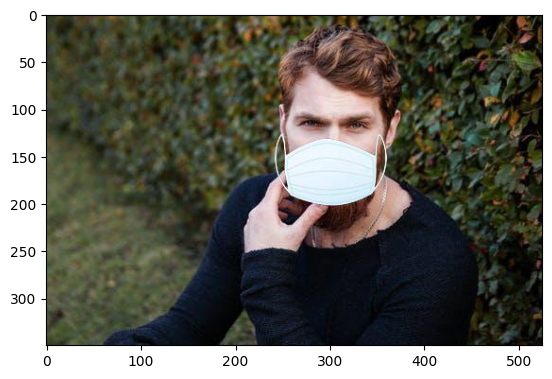

In [ ]:
#display the mask image
img=mpimg.imread('/content/drive/MyDrive/Training Data/with_mask/with_mask_1.jpg')
implot=plt.imshow(img)
plt.show()

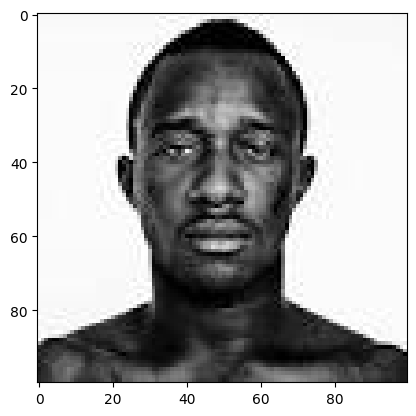

In [ ]:
#display the no mask image
img=mpimg.imread('/content/drive/MyDrive/Training Data/without_mask/without_mask_1.jpg')
implot=plt.imshow(img)
plt.show()

In [ ]:
#image processing
with_mask_path=('/content/drive/MyDrive/Training Data/with_mask/')
mask_files=os.listdir(with_mask_path)
data=[]
for img_file in mask_files:
  image= Image.open(with_mask_path + str(img_file))
  image= image.resize((128,128))
  image= image.convert("RGB")
  image= np.array(image)
  data.append(image)
without_mask_path='/content/drive/MyDrive/Training Data/without_mask/'
no_mask_files=os.listdir(without_mask_path)
for img_file in no_mask_files:
  image= Image.open(without_mask_path + str(img_file))
  image= image.resize((128,128))
  image= image.convert("RGB")
  image= np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

1000

In [ ]:
data[0]

array([[[ 70,  62,  73],
        [ 79,  71,  82],
        [ 74,  66,  75],
        ...,
        [164, 166, 188],
        [141, 143, 169],
        [125, 128, 156]],

       [[ 73,  65,  76],
        [ 77,  69,  80],
        [ 66,  59,  68],
        ...,
        [163, 163, 185],
        [143, 144, 168],
        [131, 133, 158]],

       [[ 68,  60,  71],
        [ 68,  60,  71],
        [ 57,  48,  57],
        ...,
        [165, 162, 180],
        [146, 144, 165],
        [136, 134, 156]],

       ...,

       [[ 89,  79,  95],
        [ 94,  85, 100],
        [ 99,  91, 108],
        ...,
        [ 49,  37,  51],
        [ 53,  39,  52],
        [ 58,  44,  57]],

       [[ 88,  77,  91],
        [ 97,  85, 100],
        [105,  94, 110],
        ...,
        [ 50,  37,  51],
        [ 52,  37,  50],
        [ 60,  44,  56]],

       [[ 89,  75,  89],
        [ 97,  84,  98],
        [108,  96, 112],
        ...,
        [ 50,  37,  51],
        [ 52,  37,  50],
        [ 60,  44,  55]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
labels = mask_lables + no_mask_lables

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(800, 128, 128, 3) (200, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[54, 53, 56],
        [55, 55, 58],
        [57, 57, 61],
        ...,
        [17, 18, 20],
        [16, 17, 19],
        [15, 16, 18]],

       [[69, 68, 73],
        [70, 69, 74],
        [71, 72, 77],
        ...,
        [16, 17, 19],
        [15, 16, 18],
        [15, 16, 18]],

       [[76, 75, 81],
        [79, 79, 85],
        [81, 83, 88],
        ...,
        [26, 28, 30],
        [17, 18, 20],
        [16, 17, 19]],

       ...,

       [[30, 29, 35],
        [29, 28, 34],
        [27, 26, 32],
        ...,
        [40, 43, 52],
        [42, 42, 53],
        [39, 39, 51]],

       [[30, 29, 35],
        [28, 27, 33],
        [25, 24, 30],
        ...,
        [41, 44, 52],
        [41, 41, 51],
        [38, 38, 48]],

       [[29, 27, 34],
        [28, 26, 33],
        [24, 22, 28],
        ...,
        [38, 41, 50],
        [39, 39, 49],
        [38, 38, 48]]], dtype=uint8)

In [ ]:
X_train_scaled[0]

array([[[0.21176471, 0.20784314, 0.21960784],
        [0.21568627, 0.21568627, 0.22745098],
        [0.22352941, 0.22352941, 0.23921569],
        ...,
        [0.06666667, 0.07058824, 0.07843137],
        [0.0627451 , 0.06666667, 0.0745098 ],
        [0.05882353, 0.0627451 , 0.07058824]],

       [[0.27058824, 0.26666667, 0.28627451],
        [0.2745098 , 0.27058824, 0.29019608],
        [0.27843137, 0.28235294, 0.30196078],
        ...,
        [0.0627451 , 0.06666667, 0.0745098 ],
        [0.05882353, 0.0627451 , 0.07058824],
        [0.05882353, 0.0627451 , 0.07058824]],

       [[0.29803922, 0.29411765, 0.31764706],
        [0.30980392, 0.30980392, 0.33333333],
        [0.31764706, 0.3254902 , 0.34509804],
        ...,
        [0.10196078, 0.10980392, 0.11764706],
        [0.06666667, 0.07058824, 0.07843137],
        [0.0627451 , 0.06666667, 0.0745098 ]],

       ...,

       [[0.11764706, 0.11372549, 0.1372549 ],
        [0.11372549, 0.10980392, 0.13333333],
        [0.10588235, 0

In [ ]:
#building CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
23/23 [==============================] - 25s 990ms/step - loss: 0.9939 - acc: 0.6292 - val_loss: 0.3340 - val_acc: 0.9375
Epoch 2/10
23/23 [==============================] - 21s 909ms/step - loss: 0.3633 - acc: 0.8528 - val_loss: 0.2597 - val_acc: 0.9000
Epoch 3/10
23/23 [==============================] - 23s 1s/step - loss: 0.2595 - acc: 0.9069 - val_loss: 0.0307 - val_acc: 1.0000
Epoch 4/10
23/23 [==============================] - 21s 899ms/step - loss: 0.1874 - acc: 0.9417 - val_loss: 0.0536 - val_acc: 0.9750
Epoch 5/10
23/23 [==============================] - 23s 997ms/step - loss: 0.1245 - acc: 0.9750 - val_loss: 0.0425 - val_acc: 0.9875
Epoch 6/10
23/23 [==============================] - 21s 898ms/step - loss: 0.1209 - acc: 0.9597 - val_loss: 0.0318 - val_acc: 0.9875
Epoch 7/10
23/23 [==============================] - 23s 985ms/step - loss: 0.1326 - acc: 0.9667 - val_loss: 0.0337 - val_acc: 0.9875
Epoch 8/10
23/23 [==============================] - 21s 893ms/step - los

In [ ]:
#Model evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

7/7 [==============================] - 1s 189ms/step - loss: 0.1154 - acc: 0.9600
Test Accuracy = 0.9599999785423279


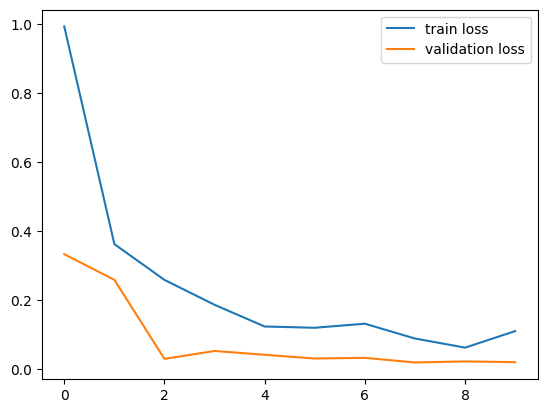

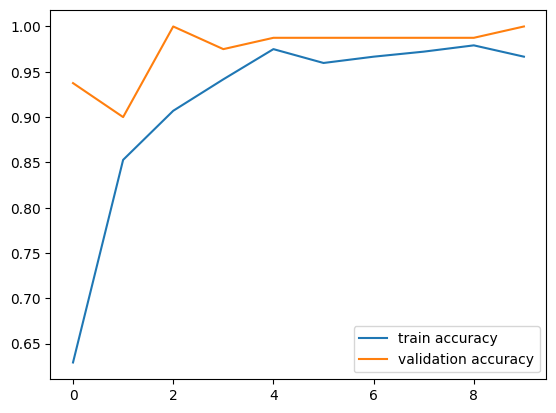

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/drive/MyDrive/Training Data/with_mask/istockphoto-1272058180-612x612.jpg


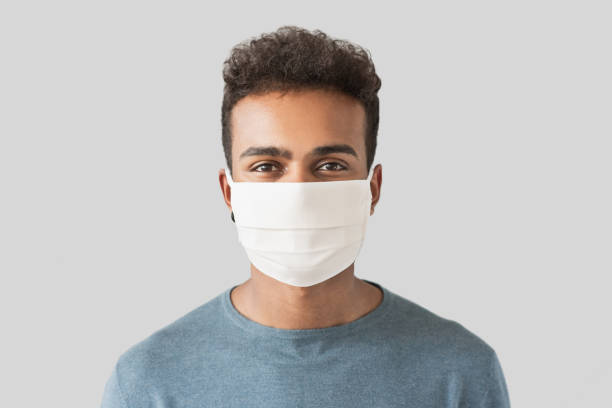

1/1 [==============================] - 0s 128ms/step
[[0.5086414  0.36231038]]
0
<class 'numpy.int64'>
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

print(type(input_pred_label))
if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/drive/MyDrive/Training Data/without_mask/istockphoto-1045886560-612x612.jpg


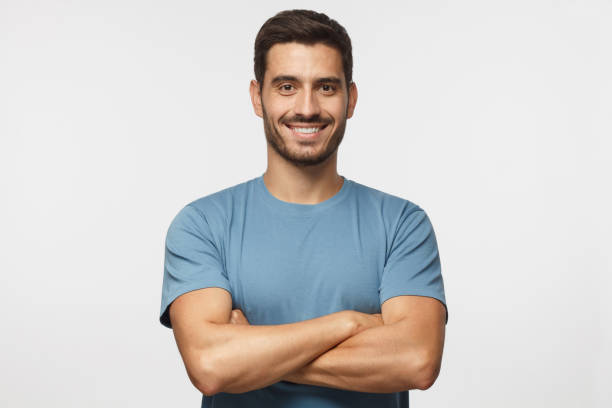

1/1 [==============================] - 0s 32ms/step
[[0.5205072  0.34217653]]
0
<class 'numpy.int64'>
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

print(type(input_pred_label))
if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')